# Kaggle Project

## Wine Quality Dataset(와인 품질 데이터세트) 🍷

**URL:** https://www.kaggle.com/datasets/yasserh/wine-quality-dataset/
- Data Description(데이터 설명): 포르투갈 "Vinho Verde" 레드 와인의 화학 물질 양과 품질에 대한 데이터를 분석하는 프로젝트로, 품질에 대한 데이터 불균형과 적은 데이터 양이 주요 도전 과제

**Task:**  
장송운 학우님의 프로젝트의 데이터를 사용하였습니다. | Midterm Project [장송운] GitHub: https://github.com/zzzsssy/mid_term_project
  
**연구배경**  
본 프로젝트는 포르투갈의 "Vinho Verde(비뉴 베르데)" `레드와인의 화학 물질 양과 품질에 관한 12개의 변수`로 구성된 레드 와인 1143개 데이터를 딥러닝을 활용하여 와인의 품질을 예측하는 것입니다.  
(This project predicts the quality of wine using deep learning using data from 1,143 red wines from Portugal's `"Vinho Verde" consisting of 12 variables related to the quantity and quality of chemical substances in red wine.`)
  

**연구문제:**  
본 연구의 핵심 문제는 `포르투갈 "Vinho Verde(비뉴 베르데)" 레드 와인의 품질을 어떻게 효과적으로 예측할 것`인가입니다. 

1. **변수 처리**: 12개의 화학적 변수가 와인의 품질에 미치는 영향을 분석하고, 이를 효과적으로 모델에 통합하는 방법은 무엇인가?

2. **최적의 딥러닝 모델 구조와 하이퍼파라미터 설정**: 와인 품질을 예측하는데 가장 적합한 딥러닝 모델 구조와 하이퍼파라미터는 무엇인가?  

3. **데이터 전처리**: 와인의 품질 분포가 훌륭하거나 불량한 와인보다 평범한 와인에 치우쳐 있으므로, 이러한 불균형을 어떻게 처리할 것인가?


**Datasets**

[Note] 데이터 셋인 `WineQT.csv`을 기반으로 다음과 같은 기준으로 학습/검증/평가 데이터을 준비 하였다.

| Dataset          | Percentage | Number of Data |
|------------------|------------|----------------|
| Train dataset    | 72%        | 822개          |
| Validation dataset | 18%      | 205개          |
| Test dataset     | 10%        | 116개          |
| Total            | 100%       | 1143개         |

**Features(x):**

* Dataset_path: WineQT.csv (1143 rows × 11 columns)
- 모두 연속형 데이터

| Description (Eng)            | Description (Kor)       | Data Type |
|-------------------------------|-------------------------|-----------|
| Fixed Acidity                 | 고정 산도               | float64   |
| Volatile Acidity              | 휘발성 산도             | float64   |
| Citric Acid                   | 시트르산                | float64   |
| Residual Sugar                | 잔류 설탕               | float64   |
| Chlorides                     | 염화물                  | float64   |
| Free Sulfur Dioxide           | 유리 이산화황           | float64   |
| Total Sulfur Dioxide          | 총 이산화황             | float64   |
| Density                       | 밀도                    | float64   |
| pH                            | pH                      | float64   |
| Sulphates                     | 황산염                  | float64   |
| Alcohol                       | 알코올                  | float64   |


**Target(y):**

* DataFrame: csv파일에서 label컬럼이 데이터의 라벨
- 연속형 데이터

| Description (Eng)                    | Description (Kor)               | Data Type |
|--------------------------------------|----------------------------------|-----------|
| Quality (score between 0 and 10)     | 품질 (0에서 10 사이의 점수)       | float64   |



---

## Model Building

### Set-Up

In [59]:
# 환경 구성
try:
    import numpy as np
    import pandas as pd
    import scipy.stats as st
    import matplotlib.pyplot as plt
    import seaborn as sns
    plt.rcParams.update({'font.size': 15}) ## 기본 폰트 크기 설정
    import random
    from glob import glob
    import warnings
    warnings.filterwarnings("ignore") ## deprecated 경고 무시용
    import torch, torchvision
    import torch.nn as nn
    import torch.nn.functional as F
    import torch.optim as optim
    from sklearn.preprocessing import MinMaxScaler
    from torch.utils.data import Dataset, DataLoader, TensorDataset, random_split
except:
    %pip install numpy seaborn pandas matplotlib torch

### Data preprocessing

### 데이터 예시 확인

In [60]:
# 데이터 예시 확인
df_data = pd.read_csv("WineQT.csv") 
print(f"[df_data.shape]\n{df_data.shape}\n")
print("[df_data.head()]")
df_data.head()

[df_data.shape]
(1143, 13)

[df_data.head()]


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


#### 결측 및 중복 값 처리

In [61]:
print("Null 데이터 확인:", df_data.isnull().sum().sum())

Null 데이터 확인: 0


In [62]:
print("중복 데이터 확인:", df_data[df_data.duplicated()]['quality'].value_counts())

중복 데이터 확인: Series([], Name: count, dtype: int64)


#### 데이터 식별 번호 제거

In [63]:
df_data = df_data.drop(labels='Id', axis=1)
df_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


#### 데이터 고찰

**상관관계**


1. **비선형 구조와 상호작용 학습**:
   - 도수(alcohol)와 휘발성 산도(volatile acidity)는 와인 품질(quality)과 선형성이 있지만, 외의 변수는 비선형적인 구조를 가지고 있다.  
   - 단순히 입력 변수 값이 높거나 낮은 것으로 결정되는 것이 아니라, 품질을 결정하는 각기 달리 결정된다는 것은 변수간의 복잡한 상호작용이 있다.
   - 즉, 각 입력 변수간의 상호작용이 있고, 상호작용에 따라 결정되는 특징이 품질을 결정한다.
   
따라서, 변수간의 상호작용을 잘 학습하는 딥러닝을 적용하는 것이 적합할 것으로 기대한다.  
즉, 변수 간의 상호작용에 대한 특성과 품질을 잘 학습하는 것이 중요



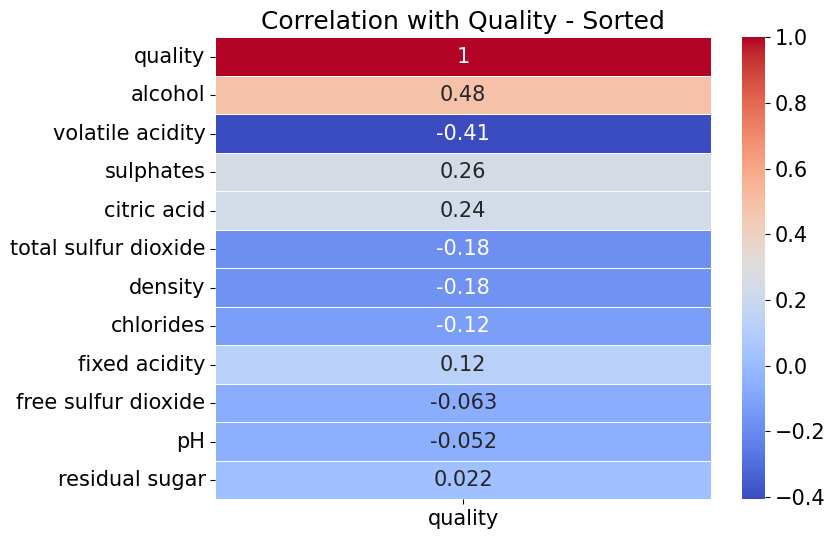

In [64]:
quality_correlation = df_data.corr()[['quality']].sort_values(by='quality', key=abs, ascending=False) ## 'quality' 변수와 다른 변수들 간의 상관관계를 계산하고 정렬함
plt.figure(figsize=(8, 6))
sns.heatmap(quality_correlation, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation with Quality - Sorted')
plt.show()

#### 데이터 범주화 및 증강
- 증강을 하지 않을 경우 중간 품질에 대한 데이터만 지나치게 학습, 검증, 평가되어 잘못된 일반화 성능이 측정될 수 있다.
> `데이터 증강 없이 학습 할 경우 사실상 val과 Test이 중간 품질에 대해서 더 높은 점수가 나오지만 이것은, 중간 품질 데이터만 두고 중간 품질을 예측하는 활동과 같음으로 잘못 된 것이다.`

- 중간 값(4 ~ 5) 데이터가 많고 그 외는 희소함으로 품질을 하(0), 중(1), 상(2)으로 범주를 다시 할당할 필요성이 있다. 
- 또한, 하와 상 품질 데이터는 다양성을 손상시키지 않는 선에서, 오버 샘플링 하여 데이터의 수를 늘려야 한다.

> `좋은 품질 와인을 낮은 품질로 예측하는 것은 부정 감정을 발생시키지 않지만 낮은 품질 와인을 높은 품질 와인으로 잘못 예측할 경우 크게 부정적`이다. 
- 앞선 관점에서, 낮은 품질의 와인이 좀더 오버 샘플링하여 낮은 품질 데이터를 더 잘 인식시키도록 해야한다. 

quality
5    483
6    462
7    143
4     33
8     16
3      6
Name: count, dtype: int64


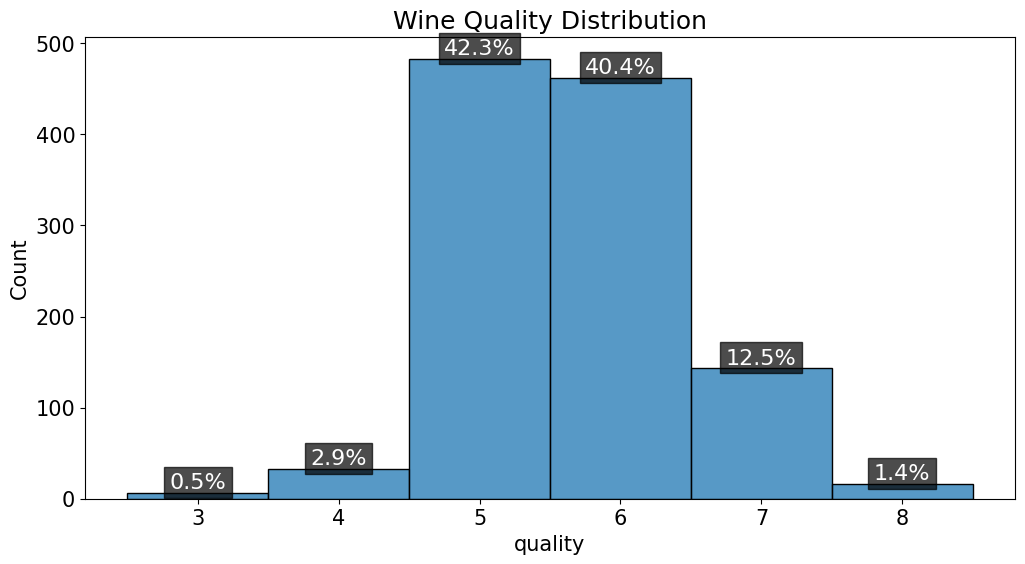

In [65]:
# 기존 데이터 확인
plt.figure(figsize=(12, 6)); ax = sns.histplot(df_data, x='quality', discrete=True) ## 히스토그램 생성
plt.title('Wine Quality Distribution') ## 제목 설정
for p in ax.patches: ## 각 막대에 대한 비율 계산 및 표시
    height = p.get_height(); total = len(df_data); percent = (height / total) * 100 ## 플롯 설정
    ax.text(p.get_x() + p.get_width() / 2., height + 5, f'{round(percent, 1)}%', ha="center", ## 텍스트 추가
            fontsize=16, color='white', bbox=dict(facecolor='black', edgecolor='black', alpha=0.7))
print(df_data['quality'].value_counts())
plt.show()


quality
1    945
2    159
0     39
Name: count, dtype: int64


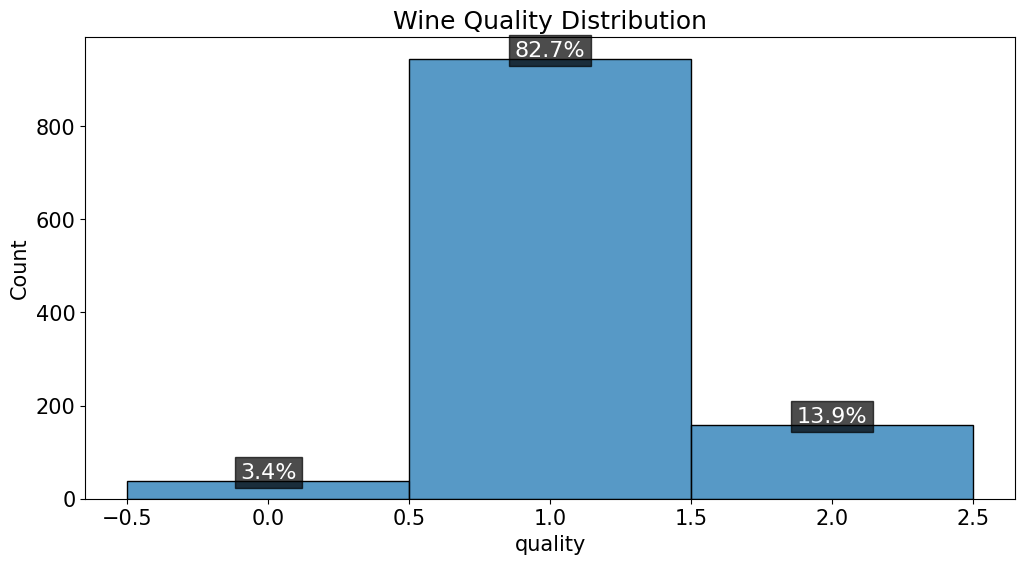

In [66]:
# quality 값에 따라 새로운 범주 값 할당
def categorize_quality(quality):
    if quality in [3, 4]:
        return 0
    elif quality in [5, 6]:
        return 1
    elif quality in [7, 8]:
        return 2
    else:
        return quality 
df_data['quality'] = df_data['quality'].apply(categorize_quality)
print(df_data['quality'].value_counts())

# 범주화 결과 확인
plt.figure(figsize=(12, 6)); ax = sns.histplot(df_data, x='quality', discrete=True) ## 히스토그램 생성
plt.title('Wine Quality Distribution') ## 제목 설정
for p in ax.patches: ## 각 막대에 대한 비율 계산 및 표시
    height = p.get_height(); total = len(df_data); percent = (height / total) * 100 ## 플롯 설정
    ax.text(p.get_x() + p.get_width() / 2., height + 5, f'{round(percent, 1)}%', ha="center", ## 텍스트 추가
            fontsize=16, color='white', bbox=dict(facecolor='black', edgecolor='black', alpha=0.7))
plt.show()

quality
1    945
2    400
0    250
Name: count, dtype: int64


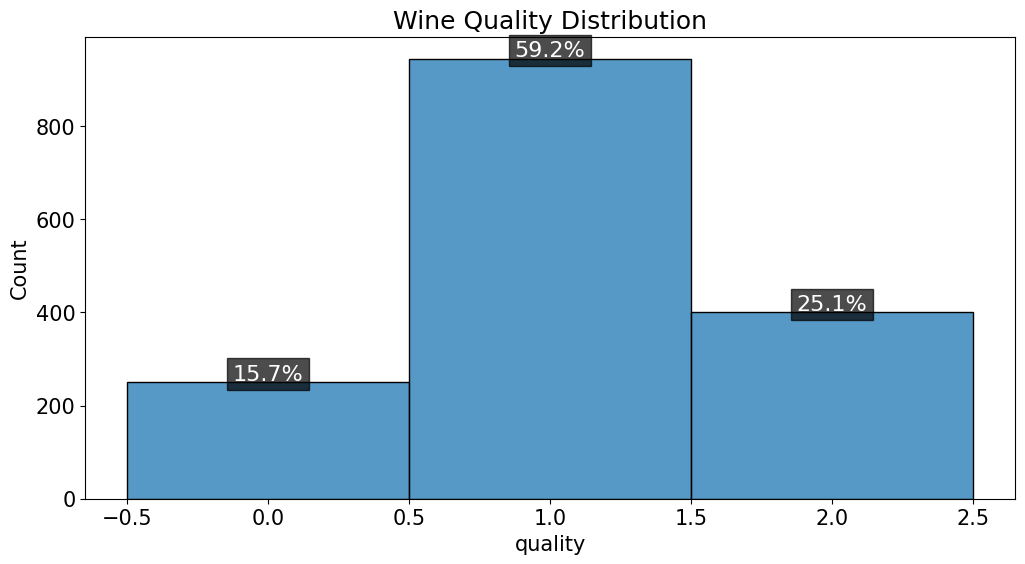

In [67]:
# 소수 0 클래스 오버샘플링
df_minority_oversampled = df_data[df_data['quality'] == 0].sample(250, replace=True)
df_data = pd.concat([df_data[df_data['quality'] != 0], df_minority_oversampled])
# 소수 2 클래스 오버샘플링
df_minority_oversampled = df_data[df_data['quality'] == 2].sample(400, replace=True)
df_data = pd.concat([df_data[df_data['quality'] != 2], df_minority_oversampled])
print(df_data['quality'].value_counts())

# 범주화 결과 확인
plt.figure(figsize=(12, 6)); ax = sns.histplot(df_data, x='quality', discrete=True) ## 히스토그램 생성
plt.title('Wine Quality Distribution') ## 제목 설정
for p in ax.patches: ## 각 막대에 대한 비율 계산 및 표시
    height = p.get_height(); total = len(df_data); percent = (height / total) * 100 ## 플롯 설정
    ax.text(p.get_x() + p.get_width() / 2., height + 5, f'{round(percent, 1)}%', ha="center", ## 텍스트 추가
            fontsize=16, color='white', bbox=dict(facecolor='black', edgecolor='black', alpha=0.7))
plt.show()

#### 이상치 제거

**결과 변수 데이터 분포 고찰**  

1. **중간 품질 데이터의 비중이 많음**:
   - 중간 품질 데이터가 많으므로 이상치를 보수적으로 측정할 경우 특징 정보가 사라질 수 있음으로, 이상치 제거 시 조심해야 함

이상치 개수 10


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
922,7.6,1.580,0.00,2.1,0.137,5.0,9.0,0.99476,3.50,0.40,10.9,0
103,9.2,0.520,1.00,3.4,0.610,32.0,69.0,0.99960,2.74,2.00,9.4,0
182,7.7,0.410,0.76,1.8,0.611,8.0,45.0,0.99680,3.06,1.26,9.4,1
275,6.6,0.735,0.02,7.9,0.122,68.0,124.0,0.99940,3.47,0.53,9.9,1
1111,6.9,0.630,0.33,6.7,0.235,66.0,115.0,0.99787,3.22,0.56,9.5,1
339,10.6,0.280,0.39,15.5,0.069,6.0,23.0,1.00260,3.12,0.66,9.2,1
1022,10.2,0.540,0.37,15.4,0.214,55.0,95.0,1.00369,3.18,0.77,9.0,1
760,7.9,0.300,0.68,8.3,0.050,37.5,278.0,0.99316,3.01,0.51,12.3,2
761,7.9,0.300,0.68,8.3,0.050,37.5,289.0,0.99316,3.01,0.51,12.3,2
59,8.6,0.490,0.28,1.9,0.110,20.0,136.0,0.99720,2.93,1.95,9.9,1


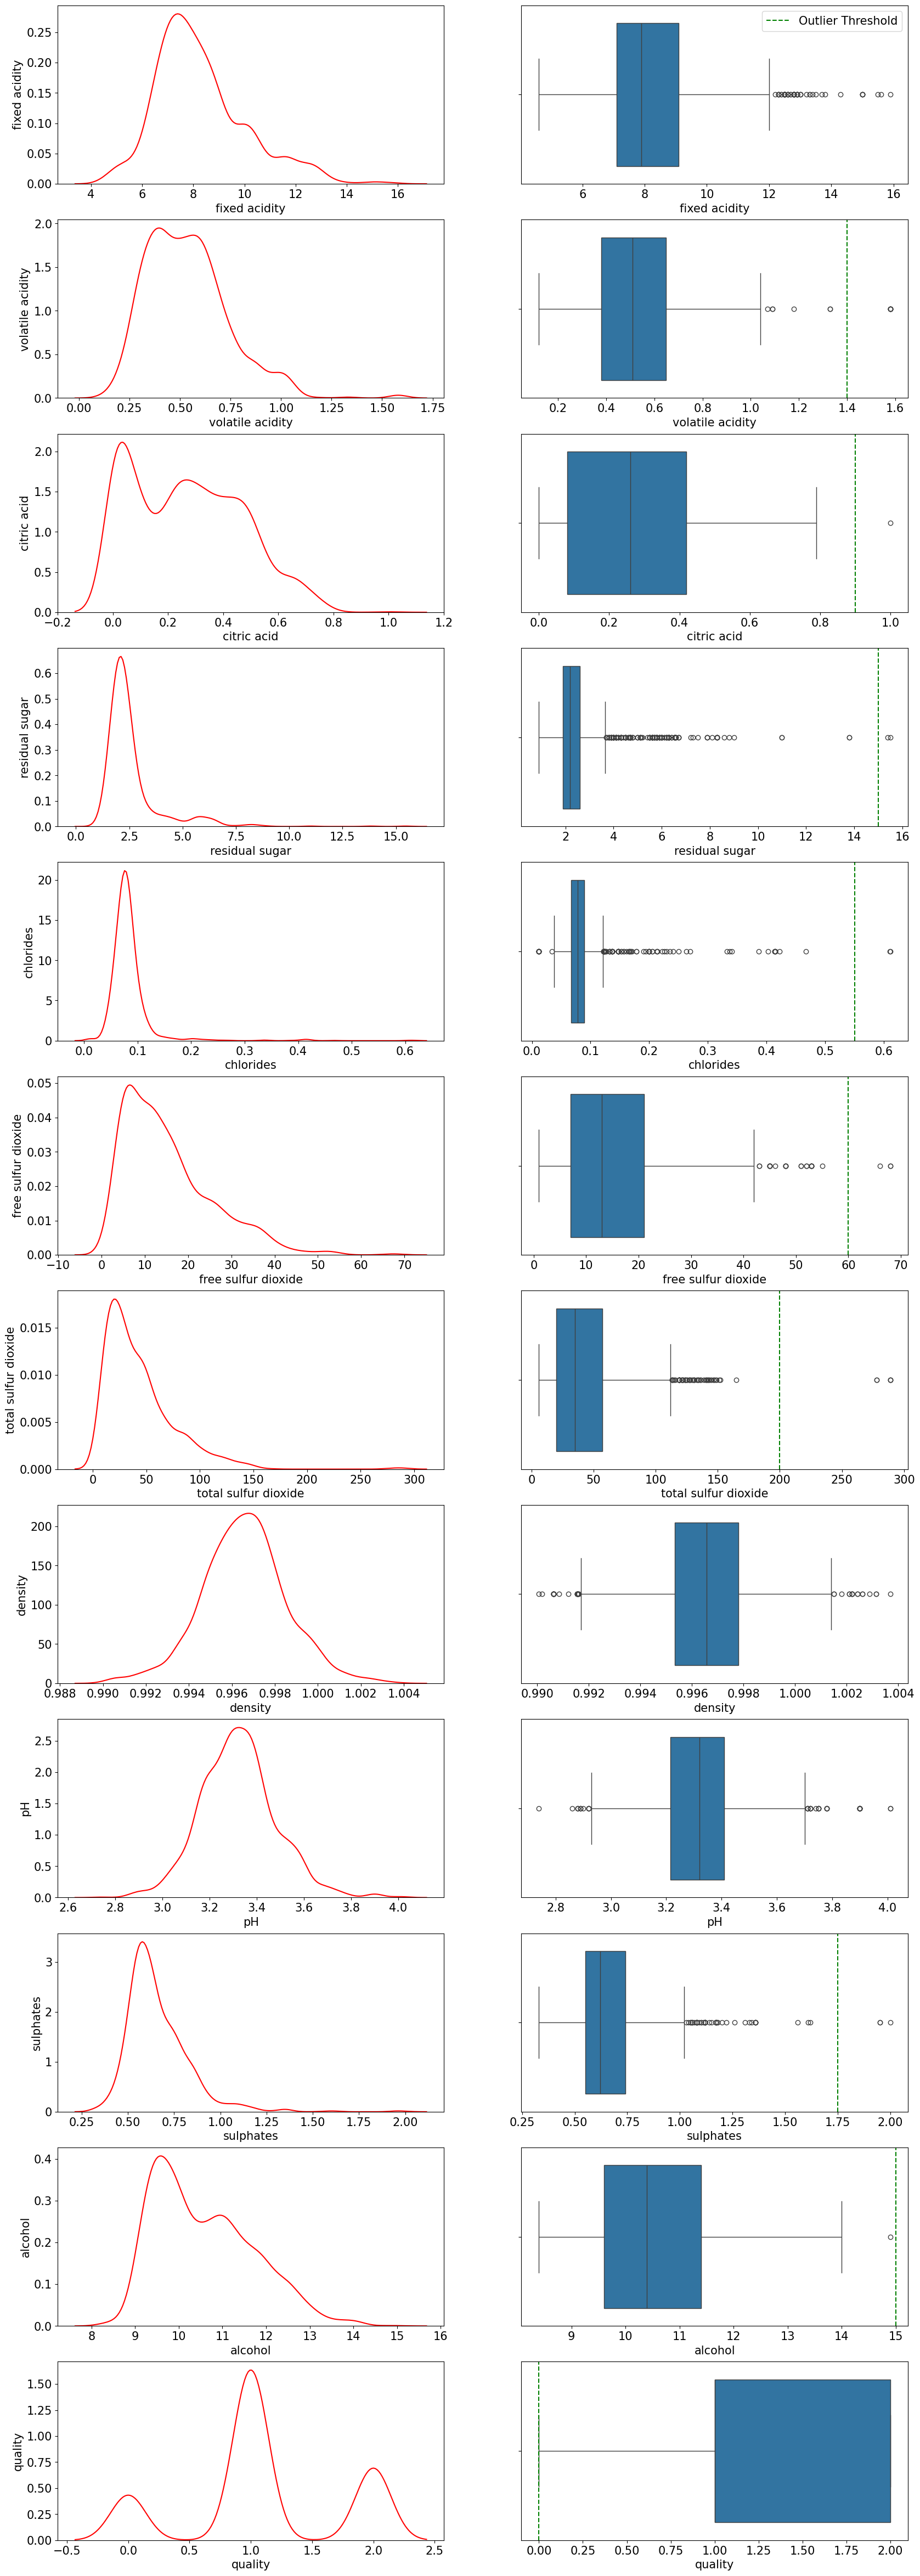

In [68]:
# 이상치 기준 설정
volatile_acidity_threshold = 1.4
citric_acid_threshold = 0.9
chlorides_threshold = 0.55
residual_sugar_threshold = 15
free_sulfur_dioxide_threshold = 60
total_sulfur_dioxide_threshold = 200
sulphates_threshold = 1.75
alcohol_threshold = 15

# 그래프 그리기
fig, axs = plt.subplots(nrows=len(df_data.columns), ncols=2, figsize=(20, 5 * len(df_data.columns)))
for idx, feature in enumerate(df_data.columns):
    axs[idx, 0].set_ylabel(feature)

    # 데이터 분포를 표시
    sns.kdeplot(df_data[feature], color='r', label='data', ax=axs[idx, 0]) ## 히스토그램 스무딩
    sns.boxplot(x=df_data[feature], ax=axs[idx, 1]) ## 박스 플롯 그리기

    # 이상치 기준선 추가
    if feature == 'volatile acidity':
        axs[idx, 1].axvline(volatile_acidity_threshold, color='g', linestyle='--', label='Outlier Threshold')
    elif feature == 'citric acid': 
        axs[idx, 1].axvline(citric_acid_threshold, color='g', linestyle='--', label='Outlier Threshold')
    elif feature == 'chlorides':
        axs[idx, 1].axvline(chlorides_threshold, color='g', linestyle='--', label='Outlier Threshold')
    elif feature == 'residual sugar':
        axs[idx, 1].axvline(residual_sugar_threshold, color='g', linestyle='--', label='Outlier Threshold')
    elif feature == 'free sulfur dioxide':
        axs[idx, 1].axvline(free_sulfur_dioxide_threshold, color='g', linestyle='--', label='Outlier Threshold')
    elif feature == 'total sulfur dioxide':
        axs[idx, 1].axvline(total_sulfur_dioxide_threshold, color='g', linestyle='--', label='Outlier Threshold')
    elif feature == 'sulphates':
        axs[idx, 1].axvline(sulphates_threshold, color='g', linestyle='--', label='Outlier Threshold')
    elif feature == 'alcohol':
        axs[idx, 1].axvline(alcohol_threshold, color='g', linestyle='--', label='Outlier Threshold')

outliers = df_data.loc[df_data['volatile acidity'] > volatile_acidity_threshold]
outliers = pd.concat([outliers, df_data.loc[df_data['citric acid'] > citric_acid_threshold]], axis=0)
outliers = pd.concat([outliers, df_data.loc[df_data['chlorides'] > chlorides_threshold]], axis=0)
outliers = pd.concat([outliers, df_data.loc[df_data['free sulfur dioxide'] > free_sulfur_dioxide_threshold]], axis=0)
outliers = pd.concat([outliers, df_data.loc[df_data['residual sugar'] > residual_sugar_threshold]], axis=0)
outliers = pd.concat([outliers, df_data.loc[df_data['total sulfur dioxide'] > total_sulfur_dioxide_threshold]], axis=0)
outliers = pd.concat([outliers, df_data.loc[df_data['sulphates'] > sulphates_threshold]], axis=0)
outliers = pd.concat([outliers, df_data.loc[df_data['alcohol'] > alcohol_threshold]], axis=0)
df_data = df_data.drop(outliers.index)
handles, labels = axs[0, 1].get_legend_handles_labels() ## 이상치 기준선 범례 추가
axs[0, 1].legend(handles=handles + [plt.axvline(0, color='g', linestyle='--', label='Outlier Threshold')], labels=labels + ['Outlier Threshold'])
outliers = outliers[~outliers.duplicated()]
print("이상치 개수", outliers.shape[0])
outliers


#### 데이터 정규화

1. **치우친 데이터 분포**:
   - 일부 변수는 한쪽으로 치우친 분포를 보임

2. **변수 값의 크기 차이**:
   - 변수 간 값의 크기가 크게 다르므로 정규화가 필요

3. **값의 범위 차이 보정**:
   - 변수 간의 값의 범위가 지나치게 크기 때문에, 이러한 변수들을 동등하게 비교하고 모델에 적용하기 위해서는 정규화가 필요

4. **데이터 구간의 불균형**:
   - 데이터에 특정 구간에 데이터가 많거나 적은 경우가 있다. 
   - 최소값과 최대값을 이용한 MinMax 스케일링은 이러한 구간에 따른 데이터의 불균형을 상대적으로 덜 고려하면서 스케일링을 진행
   - 이로써 이상치가 존재하더라도 상대적으로 덜 영향을 받을 수 있습니다.

In [69]:
# 결과 변수 quality를 제외한 입력 변수 선택
columns_to_scale = df_data.columns.drop('quality')
scaler = MinMaxScaler() ## MinMaxScaler 객체 생성 및 입력 변수에 대한 스케일링 적용
df_data[columns_to_scale] = scaler.fit_transform(df_data[columns_to_scale])
df_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.247788,0.479339,0.000000,0.077519,0.140659,0.192308,0.176101,0.590979,0.565217,0.178295,0.153846,1
1,0.283186,0.628099,0.000000,0.131783,0.189011,0.461538,0.383648,0.514526,0.295652,0.271318,0.215385,1
2,0.283186,0.528926,0.050633,0.108527,0.175824,0.269231,0.301887,0.529817,0.347826,0.248062,0.215385,1
3,0.584071,0.132231,0.708861,0.077519,0.138462,0.307692,0.339623,0.606269,0.260870,0.193798,0.215385,1
4,0.247788,0.479339,0.000000,0.077519,0.140659,0.192308,0.176101,0.590979,0.565217,0.178295,0.153846,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1009,0.238938,0.181818,0.417722,0.124031,0.114286,0.384615,0.194969,0.392202,0.426087,0.341085,0.569231,2
1133,0.185841,0.165289,0.556962,0.116279,0.107692,0.442308,0.176101,0.364679,0.373913,0.364341,0.492308,2
707,0.380531,0.190083,0.506329,0.209302,0.215385,0.211538,0.113208,0.414373,0.321739,0.286822,0.553846,2
638,0.247788,0.425620,0.126582,0.116279,0.149451,0.288462,0.169811,0.557339,0.626087,0.279070,0.369231,2


#### 학습, 평가, 검증 데이터 구성

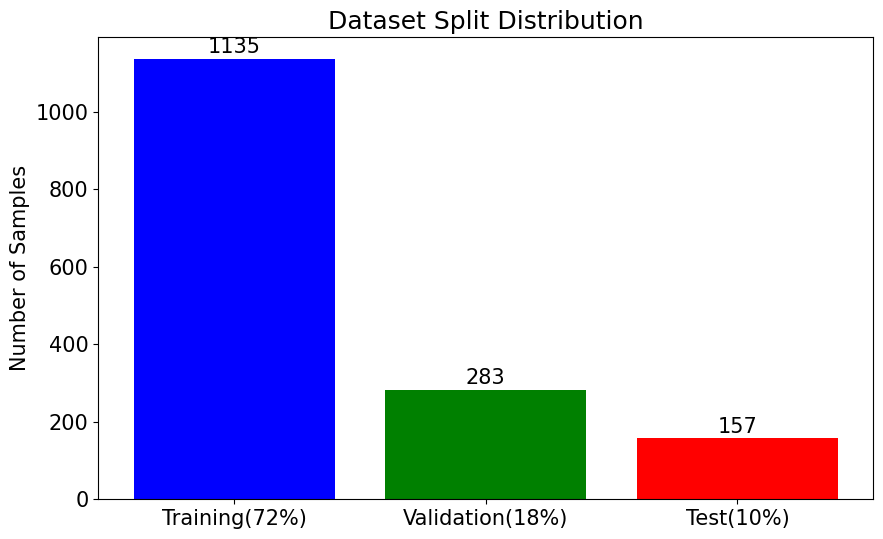

In [70]:
# 데이터셋 생성
class DataFrameDataset(Dataset):
    def __init__(self, dataframe):
        self.dataframe = dataframe
    def __len__(self):
        return len(self.dataframe)
    def __getitem__(self, idx):
        return self.dataframe.iloc[idx]
df_shuffled = df_data.sample(frac=1).reset_index(drop=True)
torch_dataset = DataFrameDataset(df_shuffled)
total_size = len(torch_dataset) ## 전체 데이터셋의 크기
# 테스트 데이터셋(전체의 10%)
test_size = int(0.1 * total_size) ## 테스트 세트 크기 설정 
train_val_size = total_size - test_size ## 훈련 및 검증 세트 크기 설정, test_size를 제외한 나머지
train_val_dataset, test_dataset = random_split(torch_dataset, [train_val_size, test_size])
# 검증 데이터셋 
val_size = int(0.2 * train_val_size) ## 검증 세트 크기 설정 (훈련 세트의 20%)
train_size = train_val_size - val_size
# 훈련 및 검증 세트 분할
train_dataset, val_dataset = random_split(train_val_dataset, [train_size, val_size])
# 데이터셋 크기를 리스트로 정의
dataset_labels = ['Training(72%)', 'Validation(18%)', 'Test(10%)']
# 막대 그래프 생성
plt.figure(figsize=(10, 6))
plt.bar(dataset_labels, [train_size, val_size, test_size], color=['blue', 'green', 'red'])
# 그래프 제목 및 레이블 설정
plt.title('Dataset Split Distribution')
plt.ylabel('Number of Samples')
# 각 막대에 데이터 수 표시
for i, size in enumerate([train_size, val_size, test_size]):
    plt.text(i, size + 5, str(size), ha='center', va='bottom')
# 그래프 표시
plt.show()

#### 데이터 구분 별 데이터 분포 히스토그램

- 일반화 성능을 올바르게 평가하기 위해, train, val, test 데이터 셋의 분포를 확인

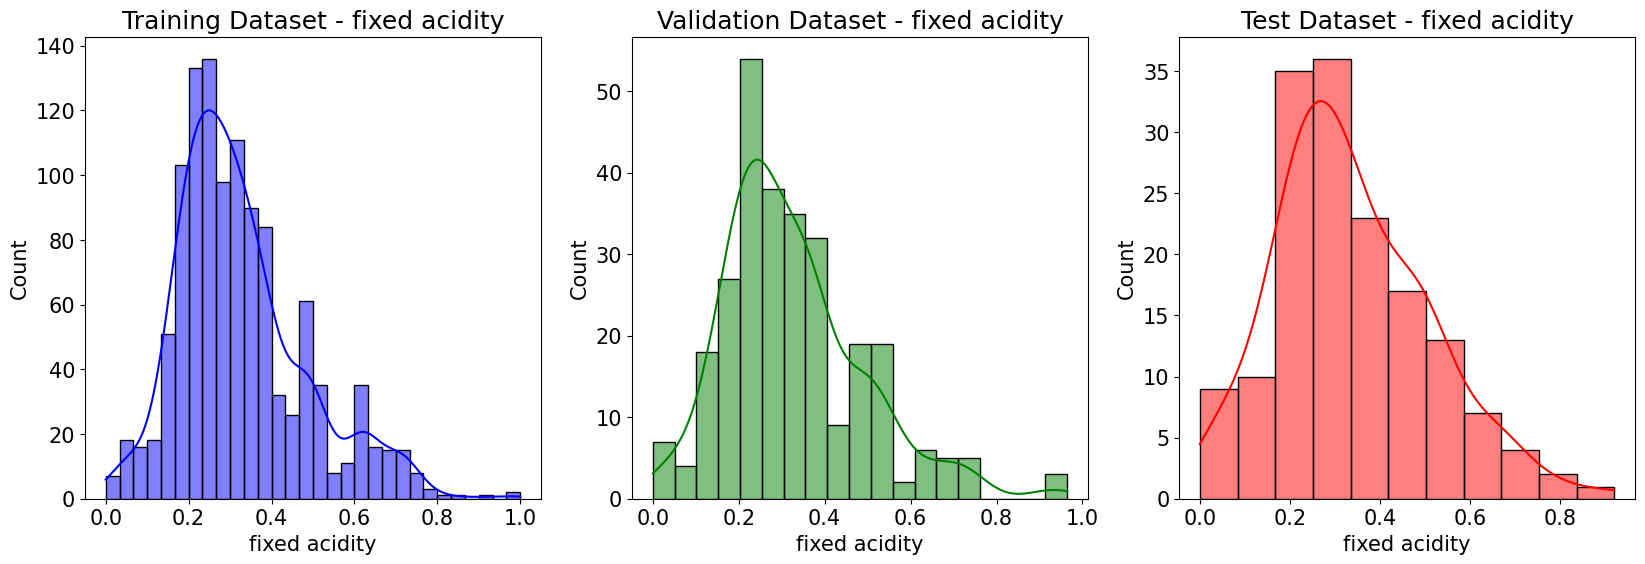

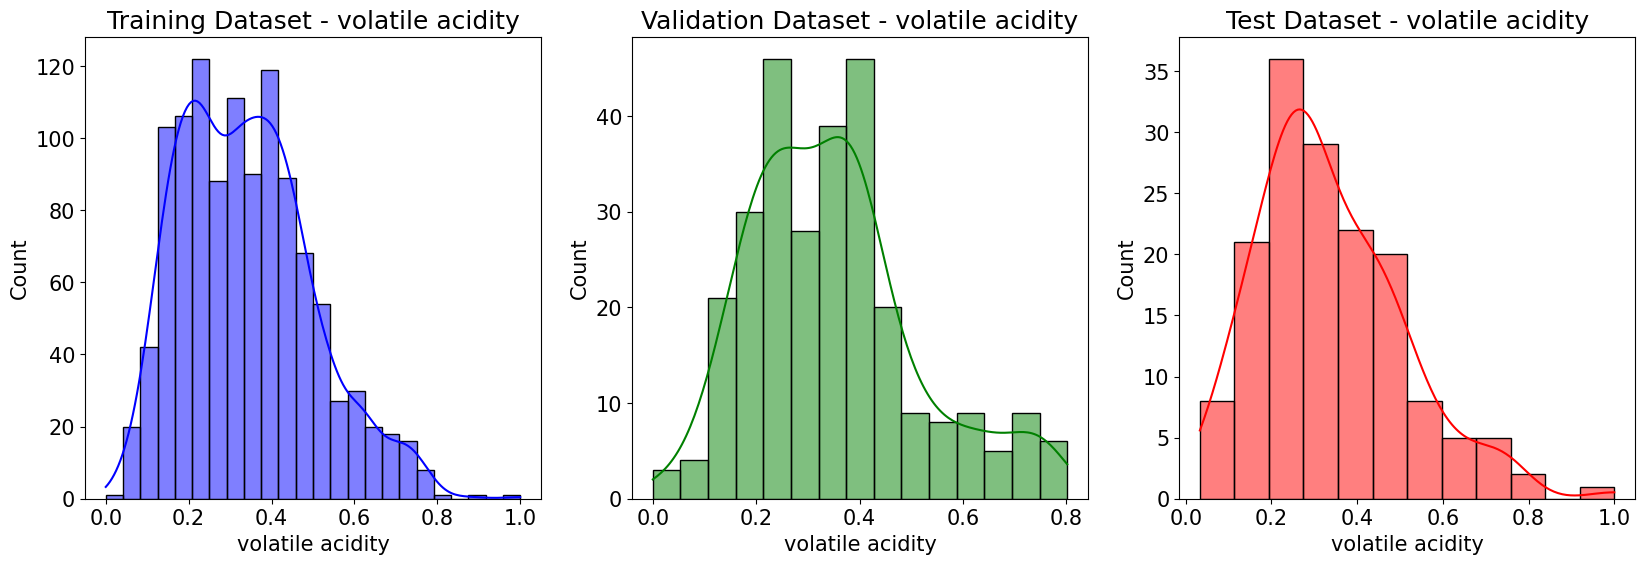

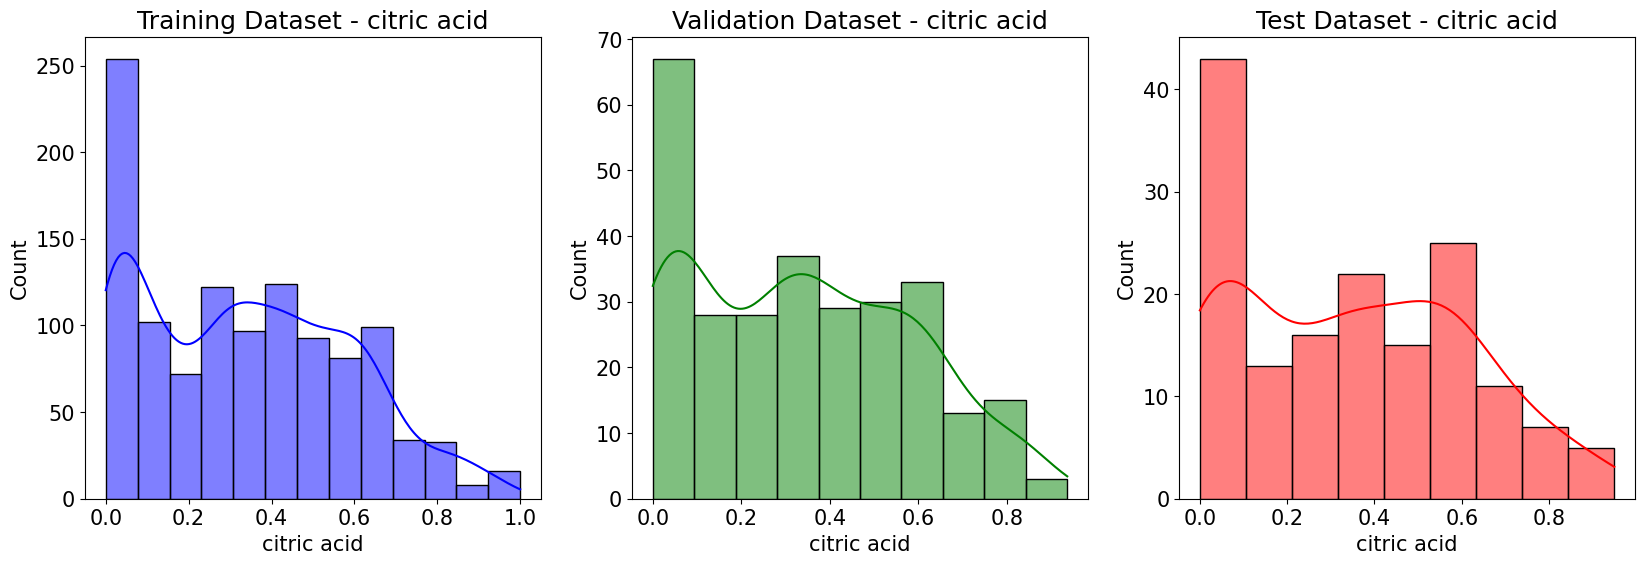

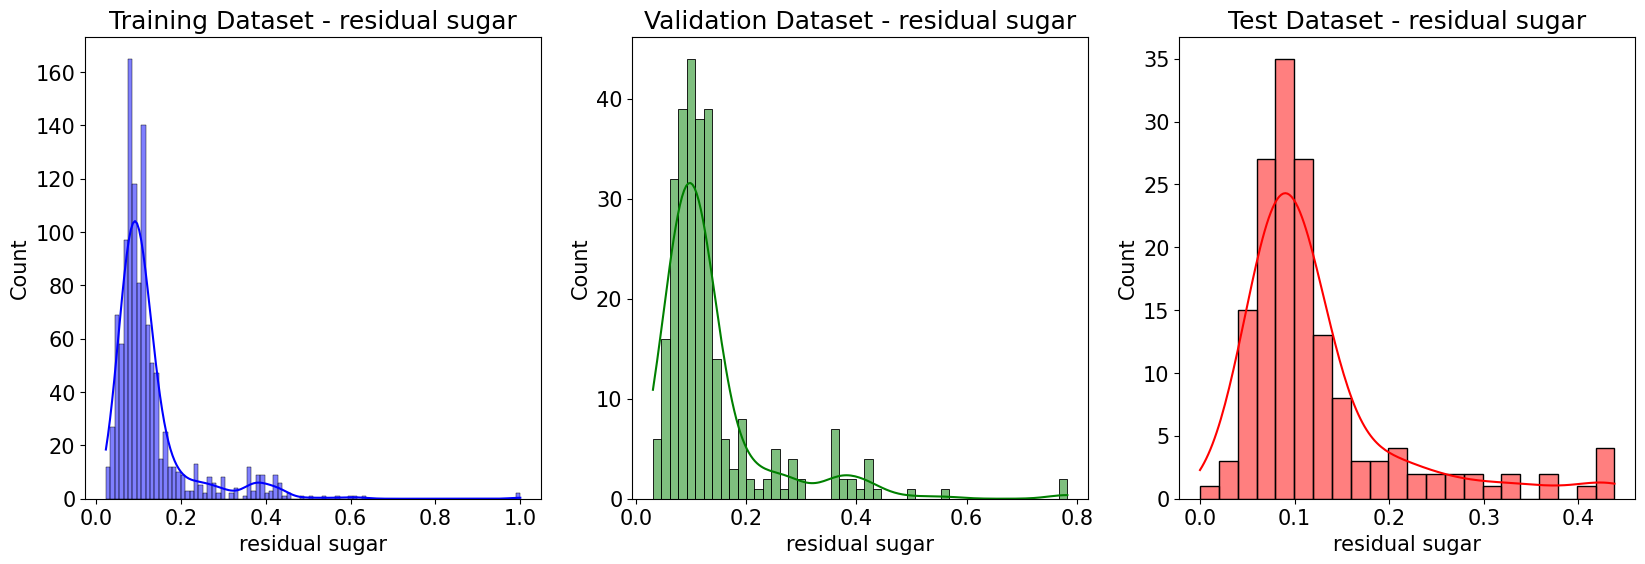

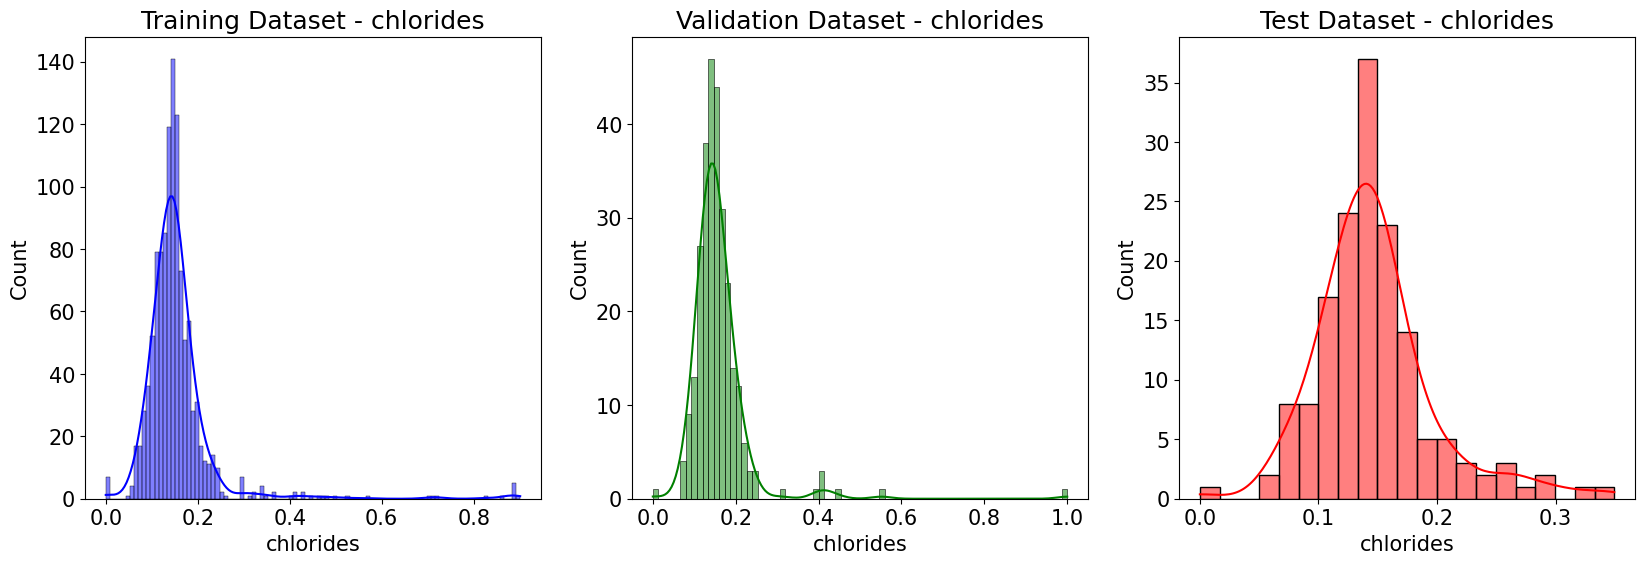

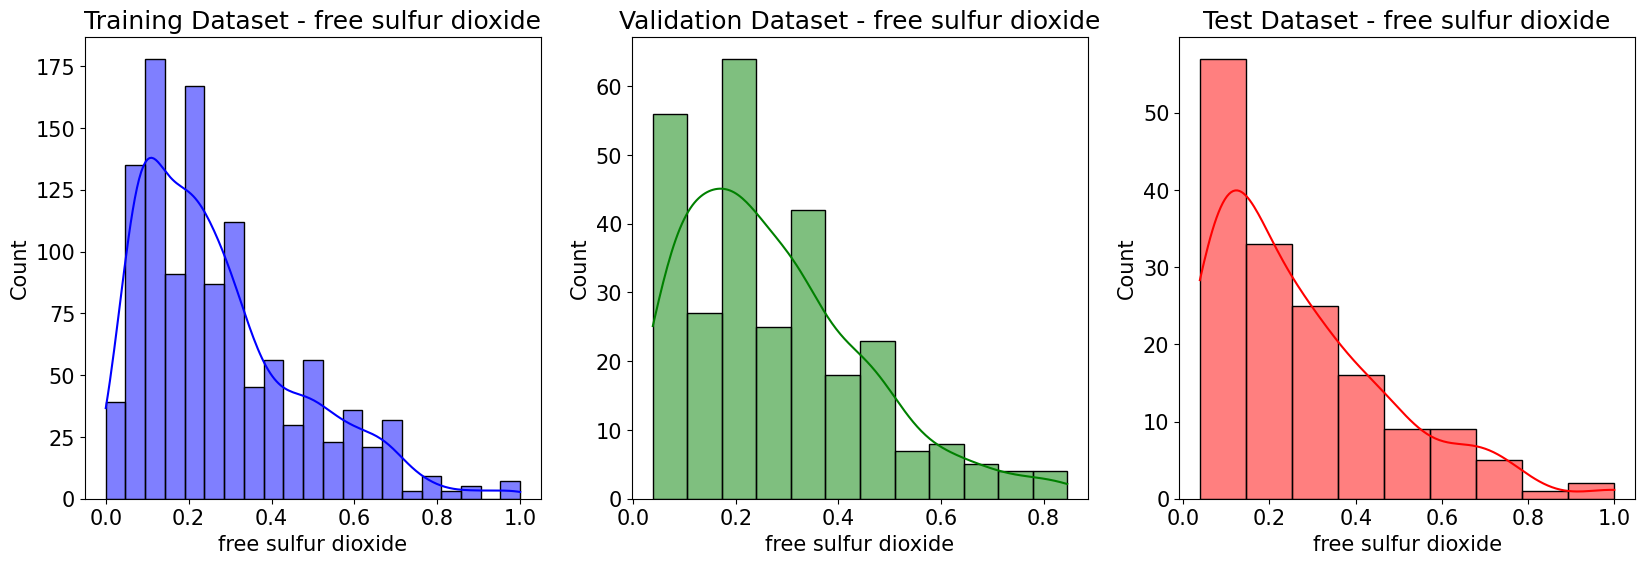

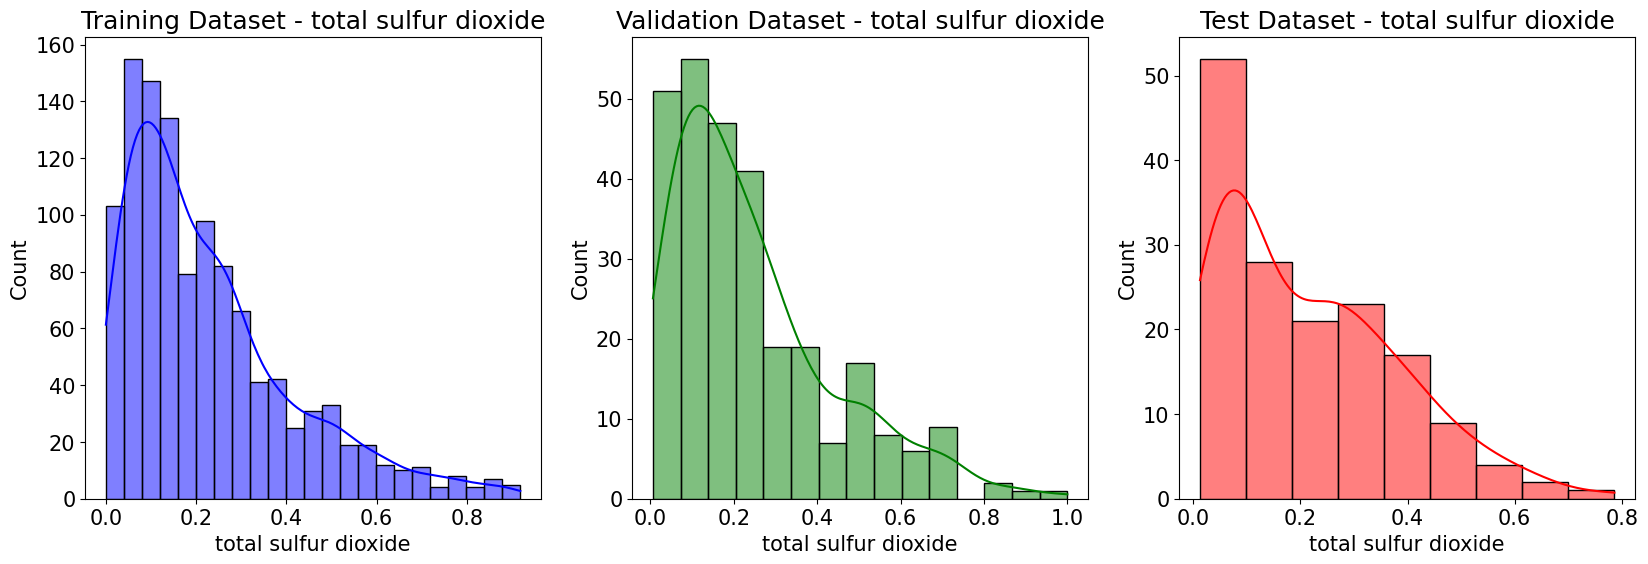

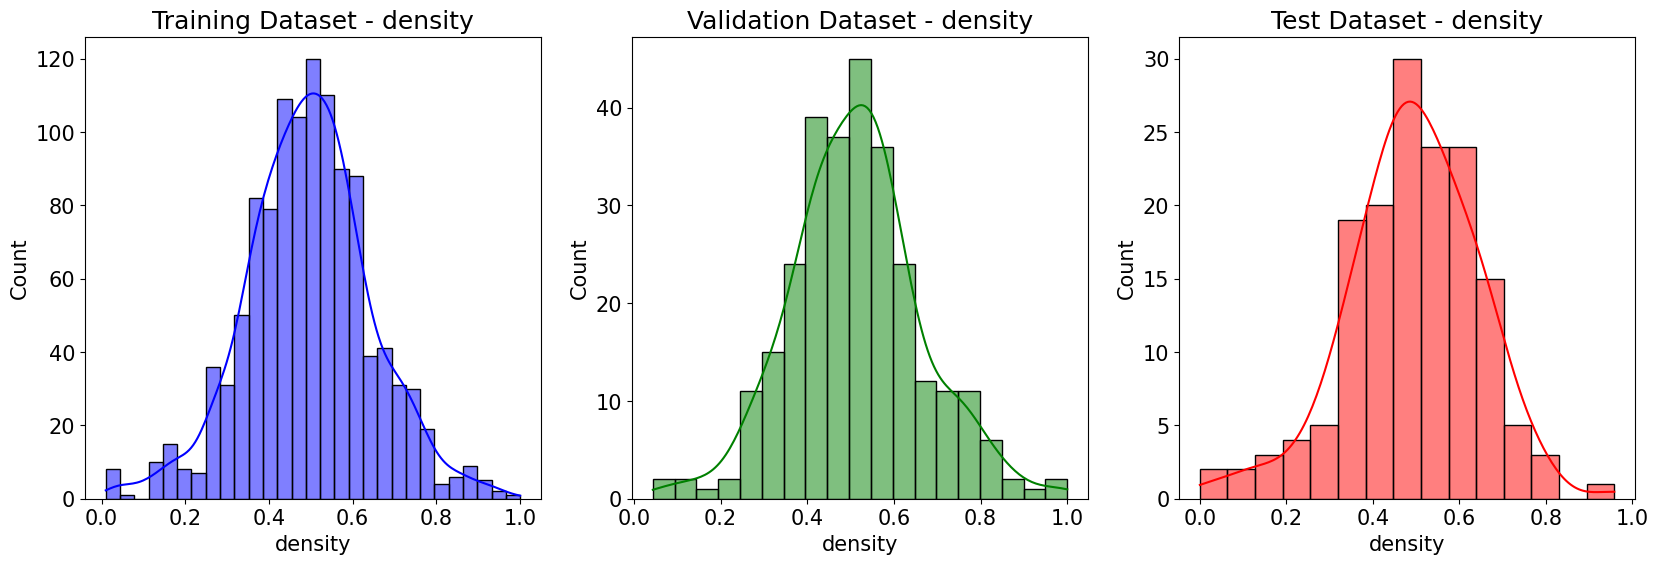

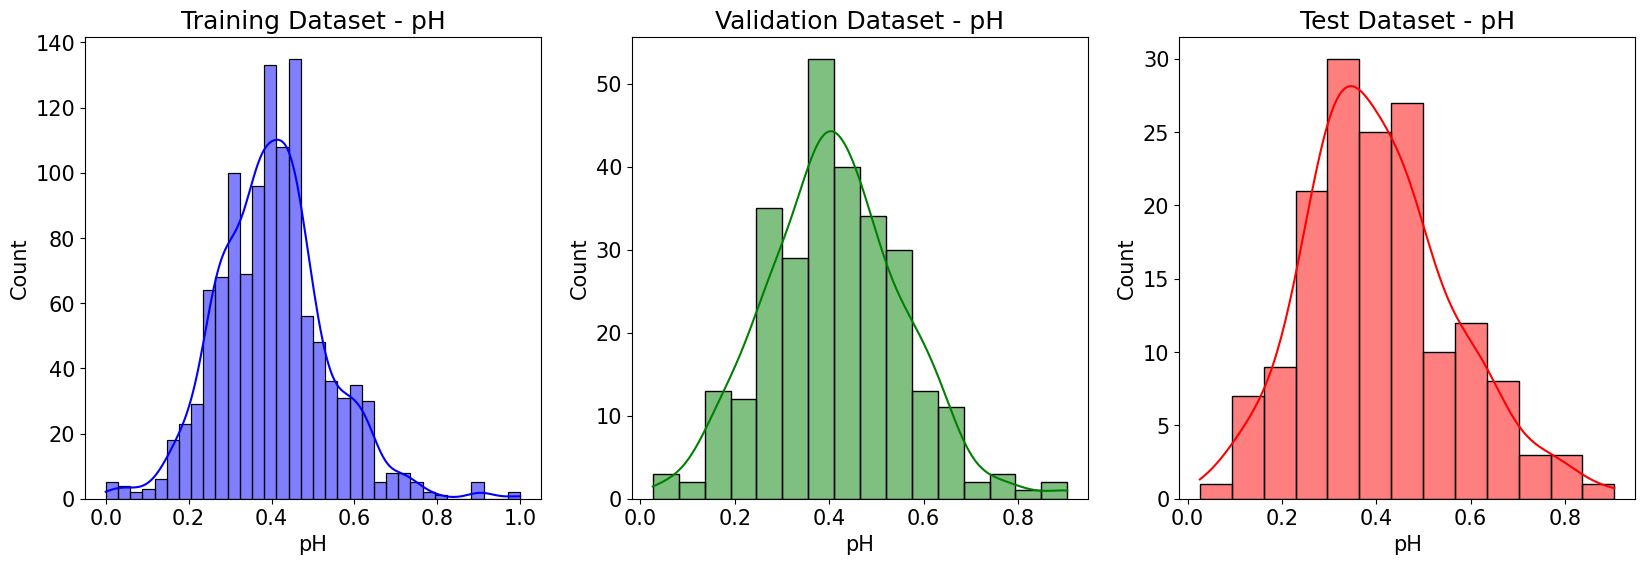

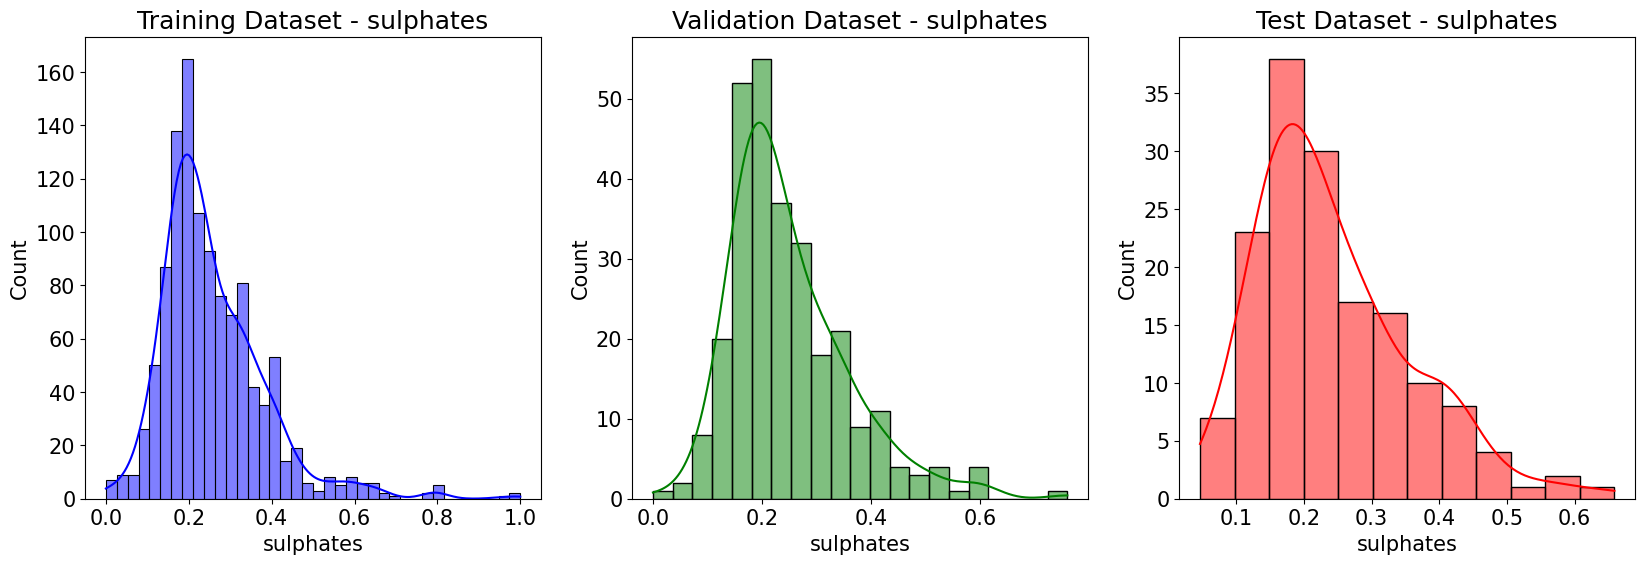

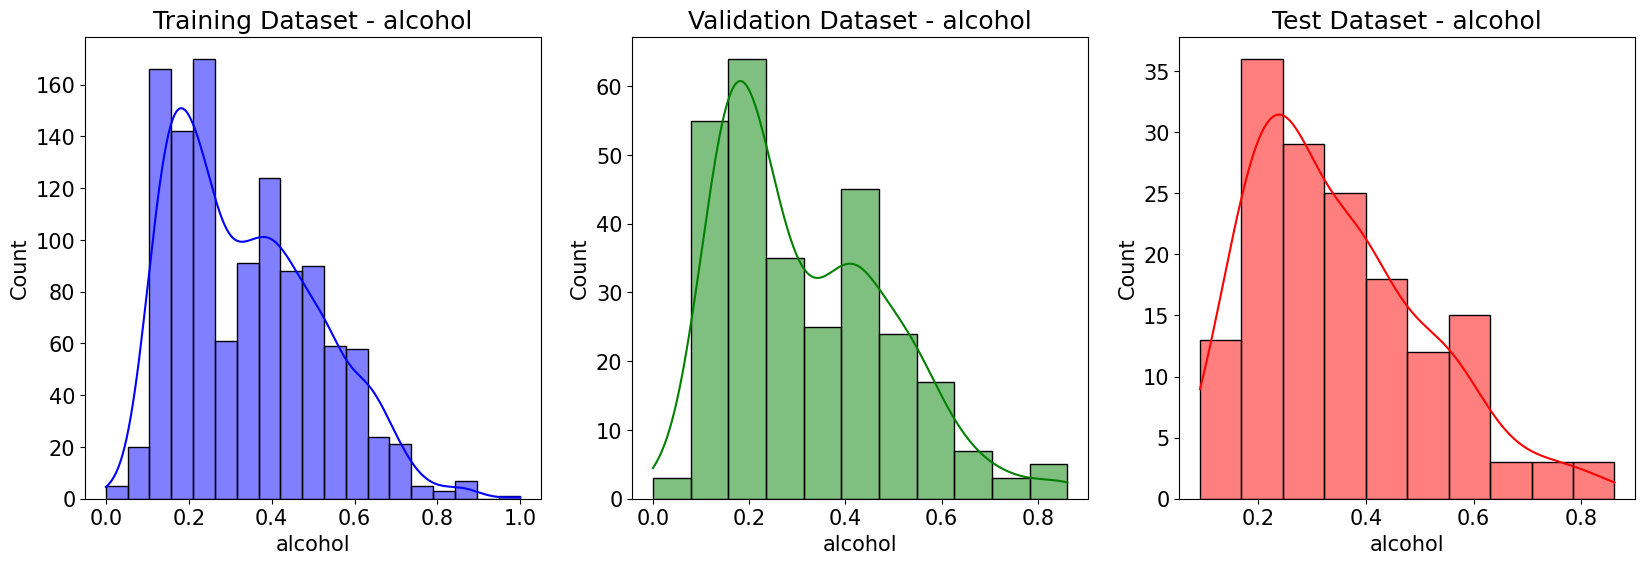

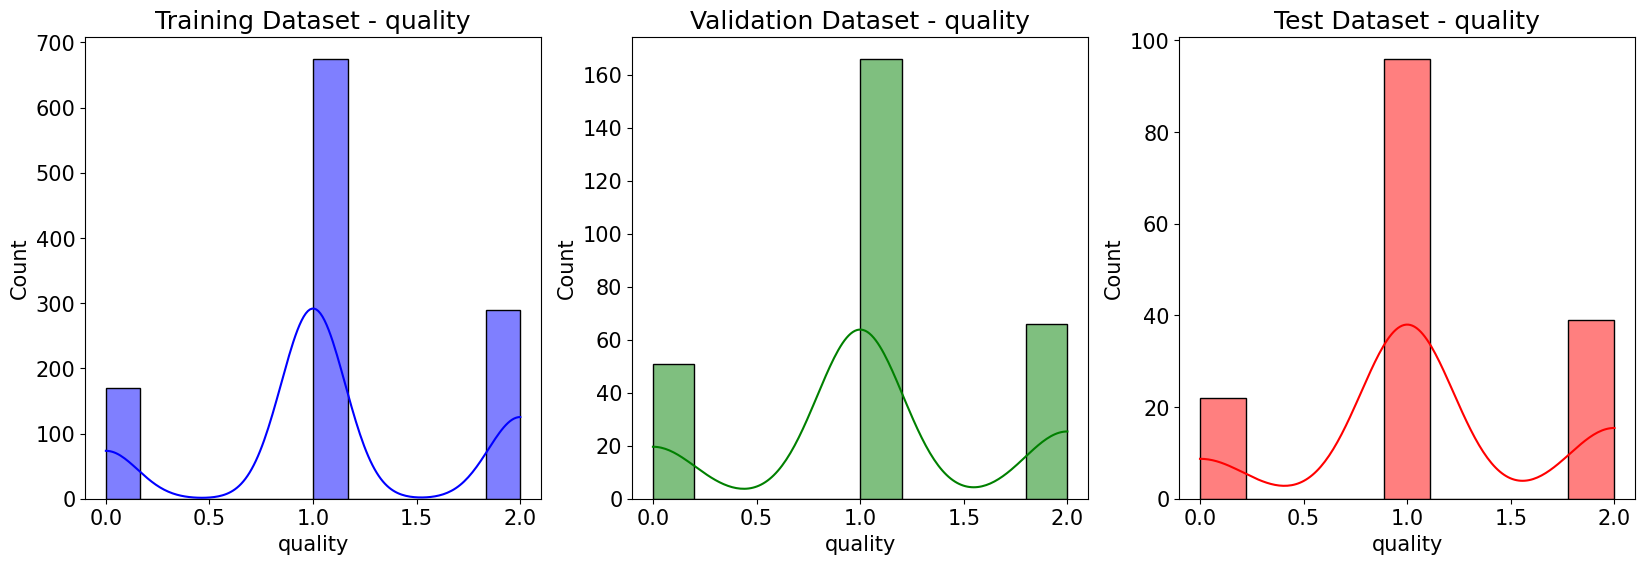

In [71]:
# DataFrameDataset을 Pandas DataFrame으로 변환
df_train = pd.DataFrame([train_dataset[i] for i in range(len(train_dataset))])
df_val = pd.DataFrame([val_dataset[i] for i in range(len(val_dataset))])
df_test = pd.DataFrame([test_dataset[i] for i in range(len(test_dataset))])

# 변수 리스트
variables = df_train.columns

# 각 변수에 대한 히스토그램 생성
for variable in variables:
    plt.figure(figsize=(20, 6))

    # 훈련 데이터셋에 대한 히스토그램
    plt.subplot(1, 3, 1)
    sns.histplot(df_train[variable], color='blue', kde=True)
    plt.title(f'Training Dataset - {variable}')

    # 검증 데이터셋에 대한 히스토그램
    plt.subplot(1, 3, 2)
    sns.histplot(df_val[variable], color='green', kde=True)
    plt.title(f'Validation Dataset - {variable}')

    # 테스트 데이터셋에 대한 히스토그램
    plt.subplot(1, 3, 3)
    sns.histplot(df_test[variable], color='red', kde=True)
    plt.title(f'Test Dataset - {variable}')

    plt.show()


### Model Construction
- 드롭아웃과 배치 정규화 적용

In [72]:
class DNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(DNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.bn1 = nn.BatchNorm1d(hidden_size)
        self.dropout1 = nn.Dropout(0.5)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.bn2 = nn.BatchNorm1d(hidden_size)
        self.dropout2 = nn.Dropout(0.5)
        self.fc3 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        x = self.fc1(x)
        x = self.bn1(x)
        x = F.relu(x)
        x = self.dropout1(x)

        x = self.fc2(x)
        x = self.bn2(x)
        x = F.relu(x)
        x = self.dropout2(x)

        x = self.fc3(x)
        return x


### Train Model & Select Model

In [73]:
# 학습 설정
batch_size = 64
learning_rate = 0.001
num_epochs = 500
hidden_size = 64

# 특성과 라벨 분리
train_features = torch.tensor(df_train.iloc[:, :-1].values, dtype=torch.float32)
train_labels = torch.tensor(df_train.iloc[:, -1].values, dtype=torch.long)
val_features = torch.tensor(df_val.iloc[:, :-1].values, dtype=torch.float32)
val_labels = torch.tensor(df_val.iloc[:, -1].values, dtype=torch.long)
test_features = torch.tensor(df_test.iloc[:, :-1].values, dtype=torch.float32)
test_labels = torch.tensor(df_test.iloc[:, -1].values, dtype=torch.long)

# 데이터 배치 설정
train_tensor_dataset = TensorDataset(train_features, train_labels)
train_loader = DataLoader(train_tensor_dataset, batch_size=batch_size, shuffle=True)
val_tensor_dataset = TensorDataset(val_features, val_labels)
val_loader = DataLoader(val_tensor_dataset, batch_size=batch_size)
test_tensor_dataset = TensorDataset(test_features, test_labels)
test_loader = DataLoader(test_tensor_dataset, batch_size=batch_size)

# DNN 설정
dnn_model = DNN(input_size=11, hidden_size=hidden_size, num_classes=6) 

# 손실 함수와 옵티마이저 설정
criterion = nn.CrossEntropyLoss()
dnn_optimizer = torch.optim.Adam(dnn_model.parameters(), lr=learning_rate)


# 손실과 정확도를 저장할 리스트 초기화
train_losses = []
val_accuracies = []

def fit(model, train_loader, val_loader, optimizer, num_epochs, criterion):
    for epoch in range(num_epochs):
        model.train()
        epoch_loss = 0
        for i, (features, labels) in enumerate(train_loader):
            # Forward pass
            outputs = model(features)
            loss = criterion(outputs, labels)
            epoch_loss += loss.item()

            # Backward and optimize
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        # 에포크당 평균 손실 계산 및 저장
        epoch_loss /= len(train_loader)
        train_losses.append(epoch_loss)

        # 모델 검증
        model.eval()
        correct = 0
        total = 0
        with torch.no_grad():
            for features, labels in val_loader:
                outputs = model(features)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        # 에포크당 정확도 계산 및 저장
        val_accuracy = 100 * correct / total
        val_accuracies.append(val_accuracy)
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}, Validation Accuracy: {val_accuracy}%')
def evaluate_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for features, labels in test_loader:
            outputs = model(features)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    test_accuracy = 100 * correct / total
    print(f'Test Accuracy: {test_accuracy}%')
    return test_accuracy

fit(dnn_model, train_loader, val_loader, dnn_optimizer, num_epochs, criterion)


Epoch [1/500], Loss: 1.5774, Validation Accuracy: 57.95053003533569%
Epoch [2/500], Loss: 1.2083, Validation Accuracy: 66.07773851590106%
Epoch [3/500], Loss: 1.0351, Validation Accuracy: 67.84452296819788%
Epoch [4/500], Loss: 0.9342, Validation Accuracy: 69.96466431095406%
Epoch [5/500], Loss: 0.8534, Validation Accuracy: 71.73144876325088%
Epoch [6/500], Loss: 0.8314, Validation Accuracy: 70.6713780918728%
Epoch [7/500], Loss: 0.7955, Validation Accuracy: 70.31802120141343%
Epoch [8/500], Loss: 0.7647, Validation Accuracy: 71.73144876325088%
Epoch [9/500], Loss: 0.7720, Validation Accuracy: 71.37809187279152%
Epoch [10/500], Loss: 0.7604, Validation Accuracy: 71.73144876325088%
Epoch [11/500], Loss: 0.7398, Validation Accuracy: 71.37809187279152%
Epoch [12/500], Loss: 0.7312, Validation Accuracy: 71.37809187279152%
Epoch [13/500], Loss: 0.7303, Validation Accuracy: 72.08480565371025%
Epoch [14/500], Loss: 0.6883, Validation Accuracy: 72.08480565371025%
Epoch [15/500], Loss: 0.6979, 

---

## Performance

Test Accuracy: 89.171974522293%


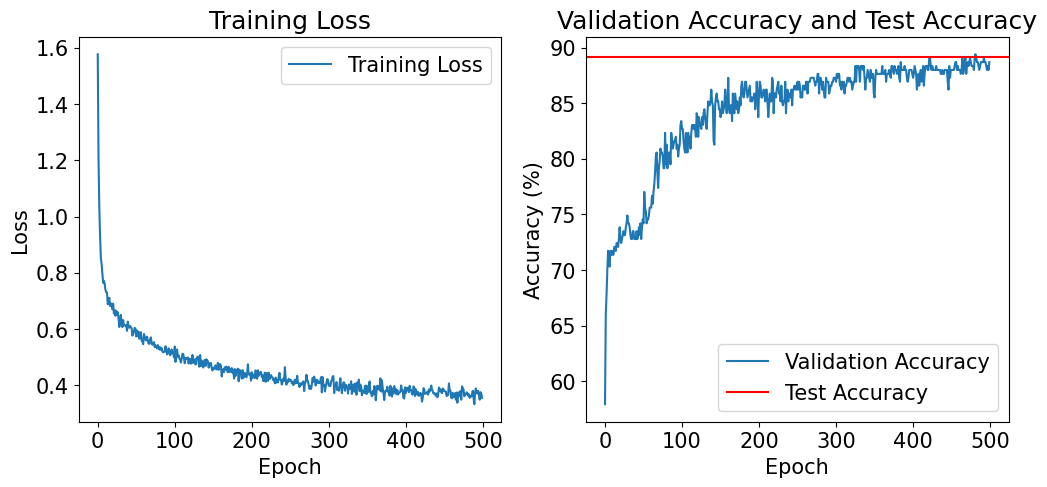

In [74]:
# 테스트 데이터셋 평가
test_accuracy = evaluate_model(dnn_model, test_loader)

# 학습 및 검증 및 테스트 시각화
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(val_accuracies, label='Validation Accuracy')
plt.axhline(y=test_accuracy, color='r', linestyle='-', label='Test Accuracy') # 테스트 정확도 추가
plt.title('Validation Accuracy and Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()

plt.show()
            